In [1]:
import os
import sys
import xarray as xr
import dask
import matplotlib.pyplot as plt
import numpy as np
import cmocean.cm as ocm

proj_dir = os.path.join(os.pardir,os.pardir)
data_dir = os.path.join(proj_dir,'data','analysis')

In [2]:
from dask.distributed import Client
C = Client()
C

Client Scheduler: tcp://127.0.0.1:33712 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 16 Cores: 16 Memory: 101.38 GB


In [19]:
ini_path = os.path.join(data_dir,'raw','waom_frc','waom2_ini.nc')
ini = xr.open_mfdataset(ini_path)

ini_pre_path = os.path.join(data_dir,'raw','waom_frc','waom2_ini_premixed.nc')
ini_pre = xr.open_mfdataset(ini_pre_path)

his_path = os.path.join(data_dir,'raw','waom2_fix','ocean_his_0008.nc')
his = xr.open_mfdataset(his_path)

avg_path = os.path.join(data_dir,'raw','waom2_fix','ocean_avg_0008.nc')
avg = xr.open_mfdataset(avg_path)


grd_path = os.path.join(data_dir,'raw','waom_frc','waom2_grd.nc')
grd = xr.open_mfdataset(grd_path)

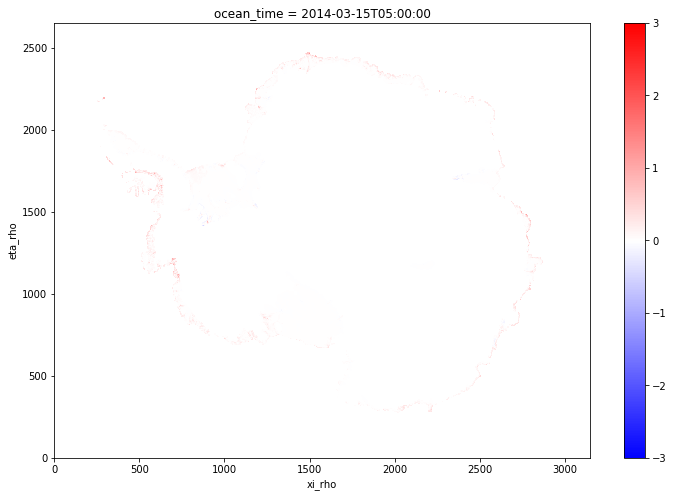

In [21]:
plt.close()
(avg.m.isel(ocean_time=-1).where((grd.mask_rho == 1 ) & (grd.zice < -100))*365.25*24*3600).plot(size=8,vmin=-3,vmax=3,cmap=plt.cm.bwr)
plt.show()

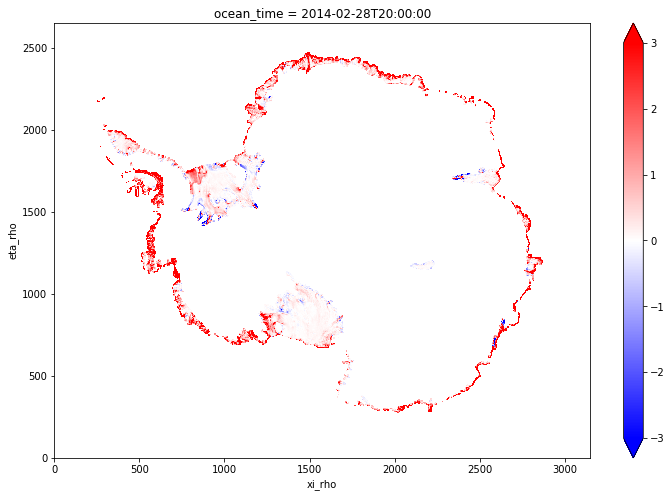

In [22]:
plt.close()
(his.m.isel(ocean_time=-1).where((grd.mask_rho == 1 ) & (grd.zice < -100))*365.25*24*3600).plot(size=8,vmin=-3,vmax=3,cmap=plt.cm.bwr)
plt.show()

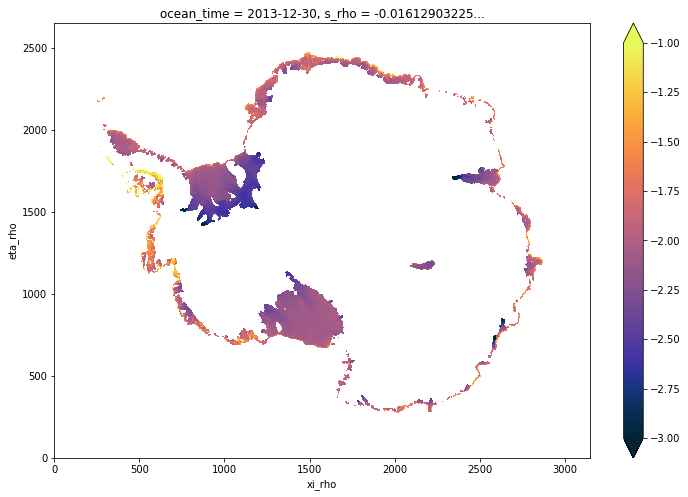

In [5]:
plt.close()
ini.temp.isel(ocean_time=0,s_rho=30).where((grd.mask_rho == 1 ) & (grd.zice < -100)).plot(size=8,vmin=-3,vmax=-1,cmap=ocm.thermal)
plt.show()

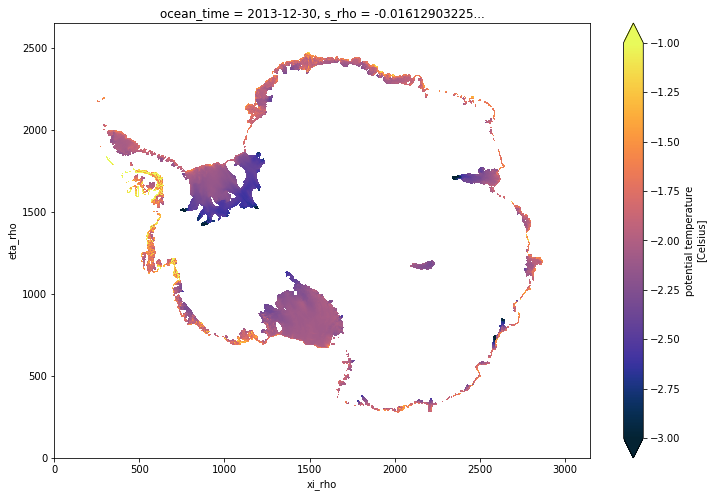

In [6]:
plt.close()
ini_pre.temp.isel(ocean_time=0,s_rho=30).where((grd.mask_rho == 1 ) & (grd.zice < -100)).plot(size=8,vmin=-3,vmax=-1,cmap=ocm.thermal)
plt.show()

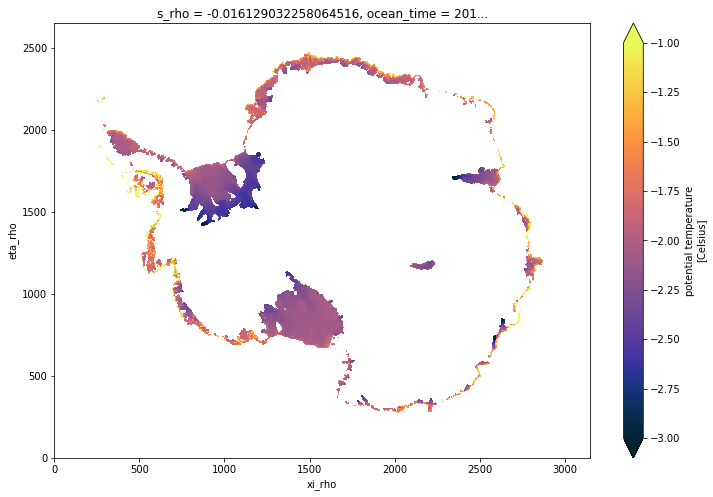

In [8]:
plt.close()
his.temp.isel(ocean_time=-1,s_rho=30).where((grd.mask_rho == 1 ) & (grd.zice < -100)).plot(size=8,vmin=-3,vmax=-1,cmap=ocm.thermal)
plt.show()

In [12]:
ini.u.isel(ocean_time=0,s_rho=30).where((grd.mask_u == 1 ))

<xarray.DataArray (eta_u: 2650, xi_u: 3149)>
dask.array<shape=(2650, 3149), dtype=float64, chunksize=(2650, 3149)>
Coordinates:
  * eta_u       (eta_u) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * xi_u        (xi_u) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
    ocean_time  datetime64[ns] 2013-12-30
    s_rho       float64 -0.01613

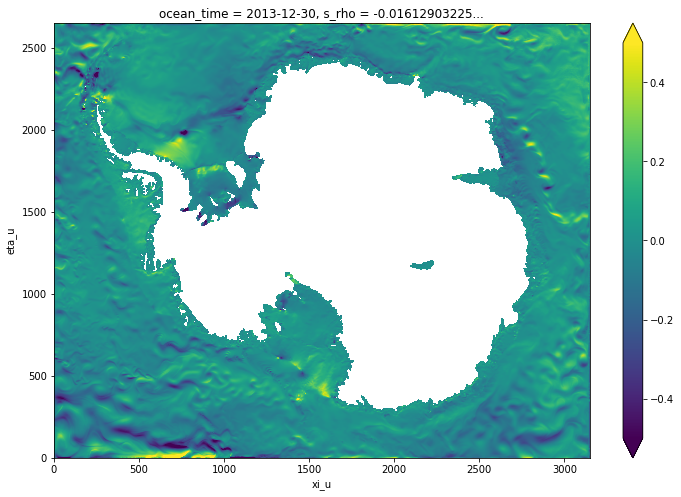

In [14]:
plt.close()
ini.u.isel(ocean_time=0,s_rho=30).where((grd.mask_u == 1)).plot(size=8,vmin=-0.5,vmax=0.5)
plt.show()

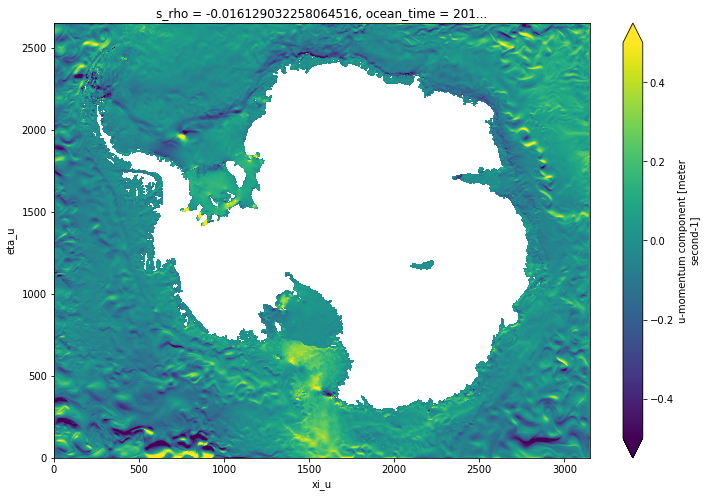

In [15]:
plt.close()
his.u.isel(ocean_time=-1,s_rho=30).where((grd.mask_u == 1)).plot(size=8,vmin=-0.5,vmax=0.5)
plt.show()